# 1. Instalasi Deepface

In [16]:
!pip install deepface

# 2. Mount Google Drive

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
%cd /content/drive/MyDrive/S3/Kuliah/Semester2/EI7007-Pembelajaran Mesin Lanjut/Tugas/Kelompok_2/PML-TugBes2

/content/drive/MyDrive/S3/Kuliah/Semester2/EI7007-Pembelajaran Mesin Lanjut/Tugas/Kelompok_2/PML-TugBes2


# 3. Import Library

In [19]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

from PIL import Image
from os import listdir
from deepface import DeepFace

# 4. Memuat data wajah dari file .pkl

In [20]:
database ={}
myfile = open("data.pkl", "rb")
database = pickle.load(myfile)
myfile.close()

# 5. Memilih model yang digunakan
## Model yang digunakan adalah ArcFace

In [21]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]
i = 6

# 6. Fungsi untuk menghitung euclidean

In [22]:
def euclidean_distance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

# 7. Fungsi untuk mencari wajah

In [23]:
def mencari_wajah(img_path):
  index = 0
  prediksi = ''
  jarak = 10
  pic2 = np.array(DeepFace.represent(img_path, model_name=models[i], align=False,
                                     enforce_detection = True))
  for key, value in database.items() :
    pic1 = value
    distance = euclidean_distance(pic1,pic2)
    # print(distance)
    if(distance < jarak):
        prediksi = key
        jarak = distance
    index += 1
  menampilkan_wajah_cocok(img_path, prediksi, jarak)

# 8. Fungsi untuk menampilkan hasil pencarian

In [24]:
def menampilkan_wajah_cocok(image_path, prediksi, jarak):
  threshhold = 4.4 
  if(jarak < threshhold):
    print (f"Ini anggota kelas bernama : {prediksi.split('.')[0]}-{round(jarak,3)}" )
  else :
    print ("Ini BUKAN anggota kelas")

  img = plt.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

# 9. Uji coba Foto yang merupakan anggota kelas.

Ini anggota kelas bernama : Meza Silvana-3.356


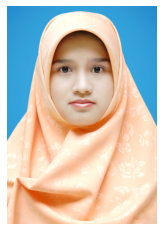

In [25]:
img_path = 'fotoTest/meza silvana.jpg'
mencari_wajah(img_path)

Ini anggota kelas bernama : Meredita Susanty-3.34


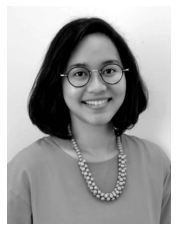

In [26]:
img_path = 'fotoTest/meredita susanty.jpg'
mencari_wajah(img_path)

# 10. Uji coba Foto yang merupakan bukan anggota kelas.

Ini BUKAN anggota kelas


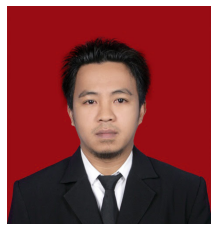

In [27]:
img_path = 'fotoTest/sucipto.jpg'
mencari_wajah(img_path)

/content/drive/MyDrive/S3/Kuliah/Semester2/EI7007-Pembelajaran Mesin Lanjut/Tugas/Kelompok_2/PML-TugBes2/UploadFiles


Saving galgadot-2.jpg to galgadot-2.jpg
User uploaded file "galgadot-2.jpg" with length 13734 bytes
/content/drive/MyDrive/S3/Kuliah/Semester2/EI7007-Pembelajaran Mesin Lanjut/Tugas/Kelompok_2/PML-TugBes2
---------------------------------
Ini BUKAN anggota kelas


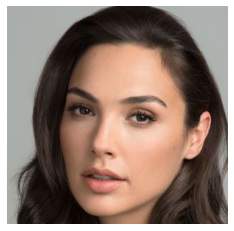

In [28]:
%cd /content/drive/MyDrive/S3/Kuliah/Semester2/EI7007-Pembelajaran Mesin Lanjut/Tugas/Kelompok_2/PML-TugBes2/UploadFiles
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])));

%cd /content/drive/MyDrive/S3/Kuliah/Semester2/EI7007-Pembelajaran Mesin Lanjut/Tugas/Kelompok_2/PML-TugBes2
img_path = "UploadFiles/" + fn
print("---------------------------------")
mencari_wajah(img_path)